# Data exploration train.csv

In [1]:
# Load data
import pandas as pd
train_data = pd.read_csv("data/train.csv")

/home/trix_arch/.conda/envs/minicomp/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# drop column "Customers" as it won't be in the test dataset
train_data.drop(columns = "Customers", inplace=True)
train_data = train_data[train_data['Sales'] > 0]

In [3]:
# explore data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512956 entries, 27 to 637773
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           512956 non-null  object 
 1   Store          497376 non-null  float64
 2   DayOfWeek      497657 non-null  float64
 3   Sales          512956 non-null  float64
 4   Open           497501 non-null  float64
 5   Promo          497517 non-null  float64
 6   StateHoliday   497396 non-null  object 
 7   SchoolHoliday  497409 non-null  float64
dtypes: float64(6), object(2)
memory usage: 35.2+ MB


In [5]:
train_data.describe()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday
count,497376.000000,497657.000000,512956.000000,497501.0,497517.000000,497409.000000
mean,558.118667,3.525149,6836.975867,1.0,0.433469,0.186991
std,321.639674,1.724264,3084.564786,0.0,0.495554,0.389905
min,1.000000,1.000000,133.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,4758.000000,1.0,0.000000,0.000000
50%,558.000000,4.000000,6246.000000,1.0,0.000000,0.000000
75%,836.000000,5.000000,8217.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,38037.000000,1.0,1.000000,1.000000


In [6]:
# show example data 
train_data.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
27,2013-01-01,353.0,2.0,3139.0,1.0,0.0,a,1.0
115,2013-01-01,335.0,2.0,2401.0,1.0,0.0,a,1.0
147,2013-01-01,512.0,2.0,2646.0,1.0,0.0,a,1.0
162,2013-01-01,494.0,2.0,3113.0,1.0,0.0,a,1.0
199,2013-01-01,530.0,2.0,2907.0,1.0,0.0,a,1.0


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>]], dtype=object)

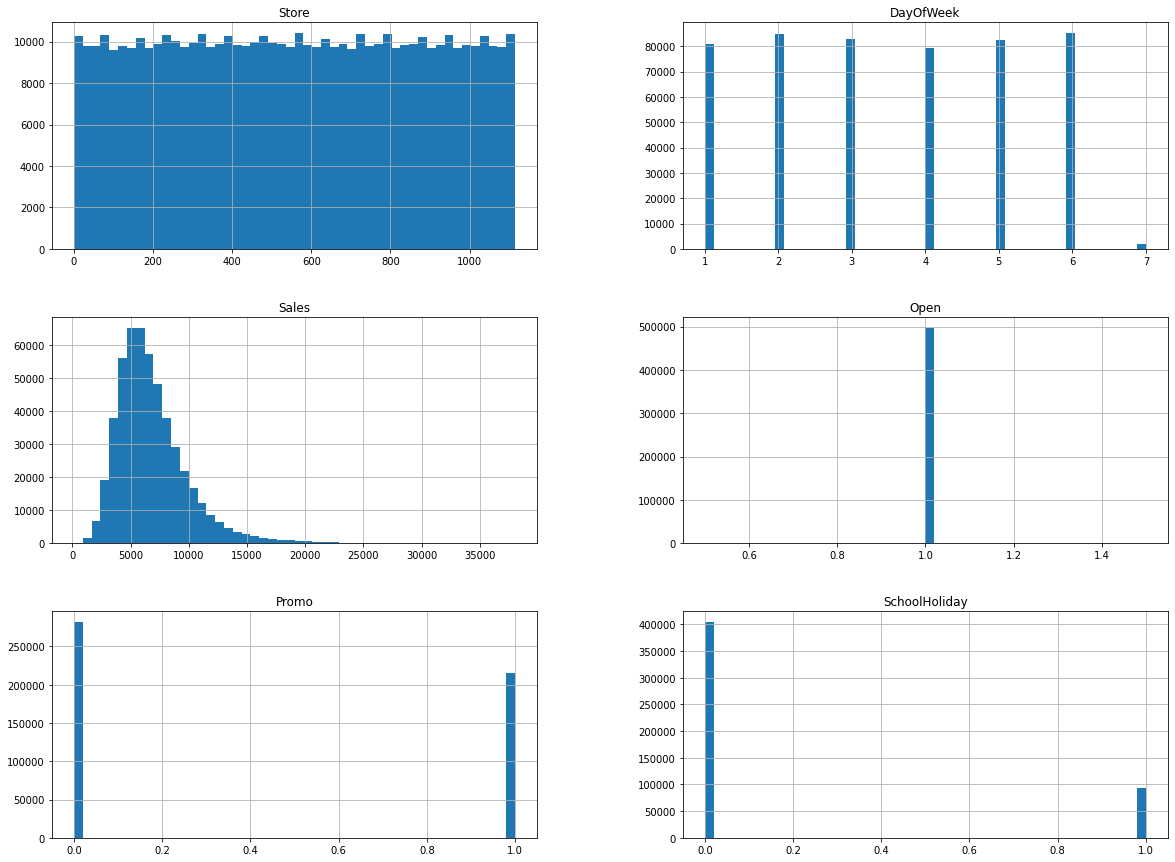

In [7]:
# show histograms
%matplotlib inline 
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))

In [8]:
# categorical variable state holiday
# what are the possible values
train_data['StateHoliday'].value_counts()

0      444136
0.0     52717
a         415
b          93
c          35
Name: StateHoliday, dtype: int64

In [9]:
# 0 and 0.0 are the same = no holiday
train_data['StateHoliday'] = train_data['StateHoliday'].replace(0.0, "0")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("a", "Easter")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("b", "Public")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("c", "Christmas")

In [10]:
train_data['StateHoliday'].value_counts()

0            496853
Easter          415
Public           93
Christmas        35
Name: StateHoliday, dtype: int64

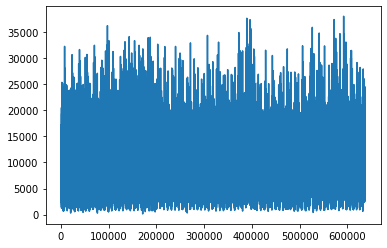

In [11]:
plt.plot(train_data['Sales'])

In [12]:
train_data['Store'].value_counts()

733.0     551
335.0     547
85.0      546
769.0     545
494.0     544
         ... 
348.0     400
972.0     383
1081.0    373
349.0     372
103.0     304
Name: Store, Length: 1115, dtype: int64